## LVDT example

Use of static calibration curve and estimate of uncertainty.

1. Measure several (at least 3) calibration points and fit a regression line to the calibration curve. 
2. Linear calibration curves are desirable because they result in the best accuracy and precision. If the data is non-linear, try logarithmic approach 
3. A plot of the calibration data and the fitted line should always be examined to check for outliers and to verify linear behavior.

In this example we use the residuals to calculate standard errors of the point estimates. The assumption is that the noise is uniform and random and it's not always a valid one.

### Example 2: LVDT calibration

Linear variable differential transformer (LVDT) is used to measure position and . The Linear Variable Differential Transformer is a position-sensing device that provides an AC output voltage proportional to the displacement of its core passing through its windings. LVDTs provide linear output for small displacements where the core remains within the primary coils. The exact distance is a function of the geometry of the LVDT.

<img src ="http://www.ni.com/cms/images/devzone/tut/a/f841fe69729.gif">  
From: NI reference <http://www.ni.com/white-paper/3638/en>

Principle: 

The LVDT will allow use to see the changing in voltage due to deflection. We will be able to find the change in AC voltage with the use of an oscilloscope. We will find several data point and plot them. From these points, we should be able to find a slope witch will be sensitivity of the LVDT. From this we can determine the voltage based on displacement or vise versa. After finding the sensitivity equation, we are able to calculate the experimental output voltage. We substitute the input, displacement in to our sensitivity equation and find the output voltage.

The system is set up. We set the five-kilohertz oscillator to give one and a half volts for peak-to-peak. The beam is moved from minimum to maximum and a sketch of the output form the oscilloscope is drawn. The beam is set to minimum and peak-to-peak voltage is taken. The beam is moved one millimeter and voltage is taken again. This is done for fifteen reading. We will then find the residual voltage or the minimum output voltage.

Finally, we plot our data on a graph and find the sensitivity with the slop equation. We then can find and graph our percent error over the entire distance.








In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as pl
%matplotlib inline

pl.rcParams['figure.figsize'] = 10, 8 
pl.rcParams['font.size'] = 18

import sys
sys.path.append('../scripts')
from linear_regression import linreg

In [12]:
# Peak-Peak Voltage (mV)
V = [98.8, 86.0, 74.0, 61.2, 47.2, 32.8, 20.4, 5.2, 8.4, 21.2, 35.2, 49.2, 63.2, 75.2, 88.4, 100.8]
# Displacement
x  = range(0,16)
# (mm)
# % Error
err = [1, 0, -3, -5, -7, -8, -21, -57, 3, 4, 0, -1, -2, 0, 0, 1]



Text(0, 0.5, '$V$ [V]')

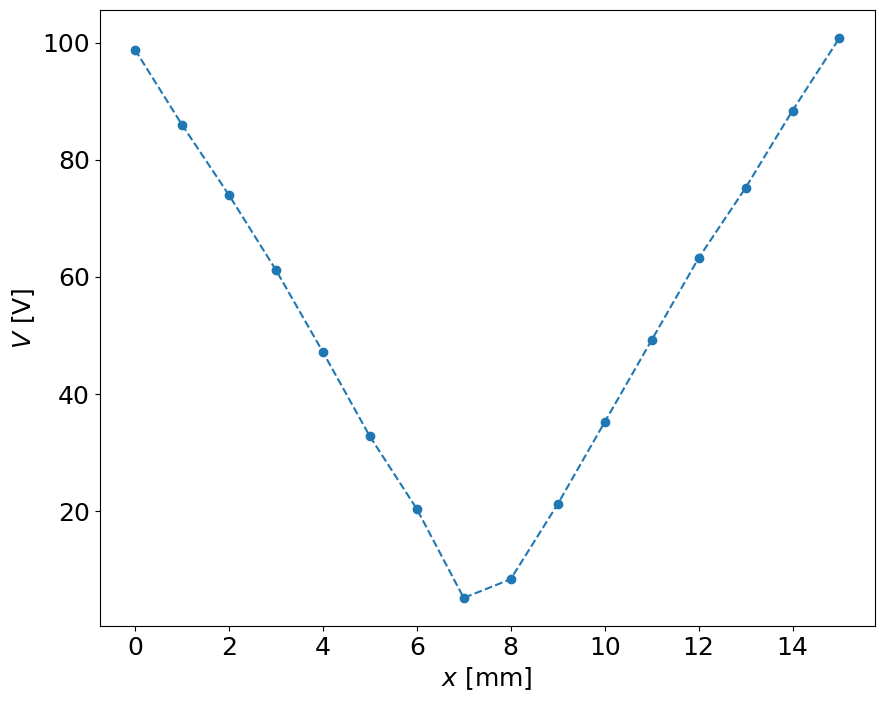

In [13]:
plt.plot(x,V,'--o')
plt.xlabel('$x$ [mm]')
plt.ylabel('$V$ [V]')


Text(0, 0.5, '$error$ [%]')

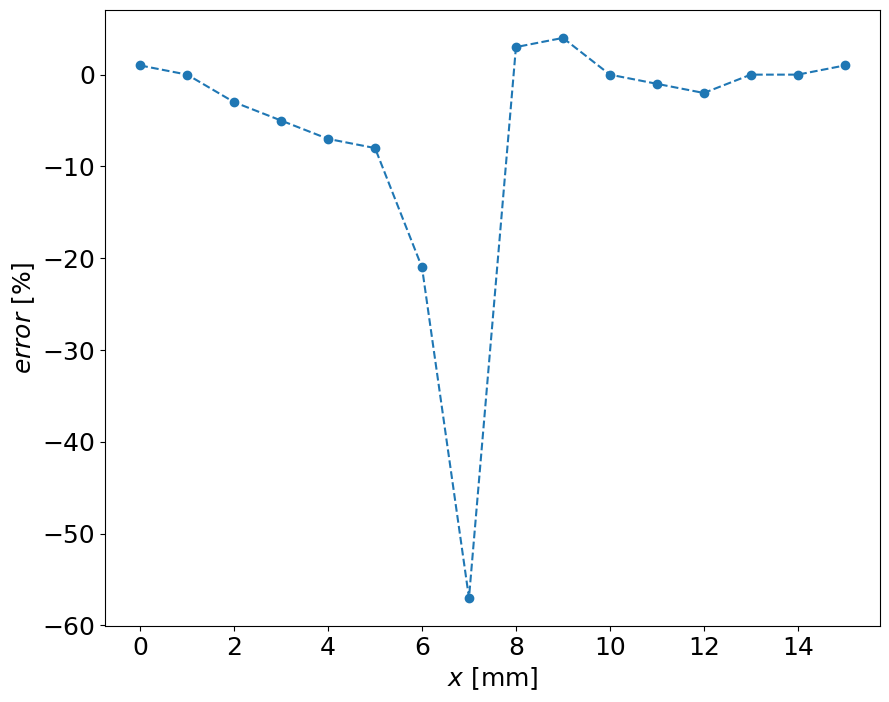

In [14]:
plt.plot(x, err,'--o')
plt.xlabel('$x$ [mm]')
plt.ylabel('$error$ [%]')

## DC type of LVDT

The LVDT will allow use to see the changing in voltage due to deflection. We will
be able to find the change in DC voltage with the use of a multi-meter. We will find several
data point and plot them. From these points, we should be able to find a slope witch will be
sensitivity of the LVDT. From this we can determine the voltage based on displacement or
vise versa. After finding the sensitivity equation, we are able to calculate the experimental
output voltage.


In [15]:
# Peak-Peak Votage (mV)
V = [0.013 , 0.997, 1.992, 2.997, 3.247, 3.499, 3.750, 4.000, 4.251, 4.500, 4.753, 5.003, 5.254, 5.560, 5.750, 6.010, 7.076]
# Displacement (mm)
x = [0.000, 0.100, 0.200, 0.300, 0.325, 0.350 ,0.375, 0.400, 0.425, 0.450, 0.475 ,0.500 ,0.525, 0.560, 0.575 ,0.600 ,0.700]
# % Error
err = [-23,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1]

Text(0, 0.5, '$V$ [V]')

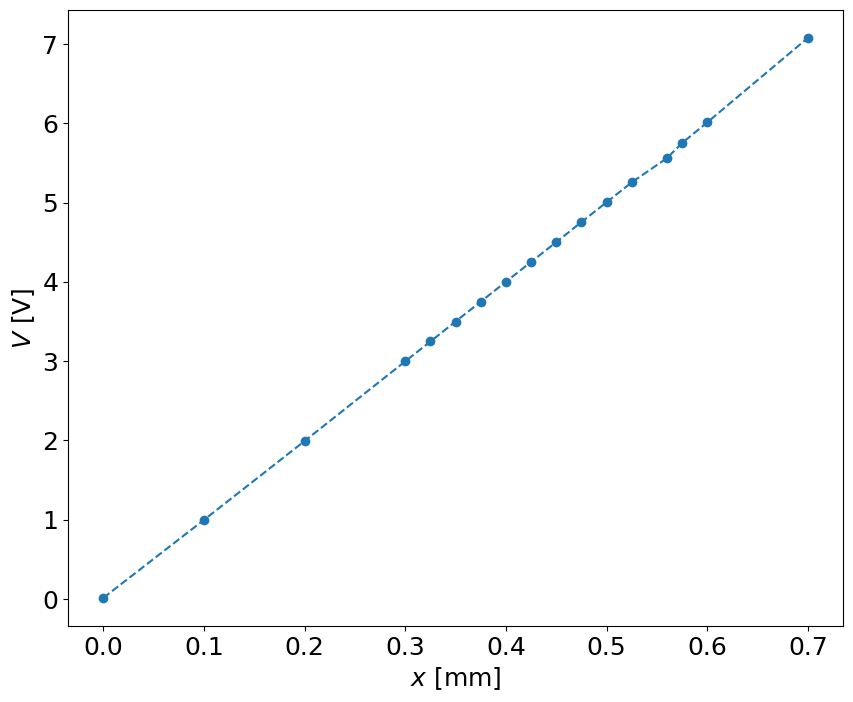

In [17]:
plt.plot(x,V,'--o')
plt.xlabel('$x$ [mm]')
plt.ylabel('$V$ [V]')


Text(0, 0.5, '$error$ [%]')

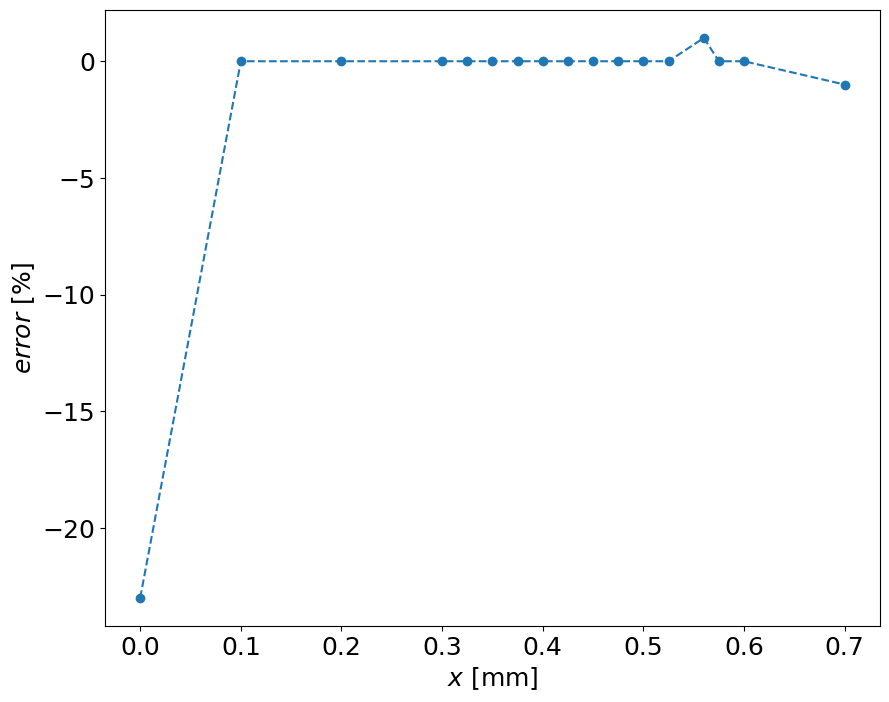

In [18]:
plt.plot(x, err,'--o')
plt.xlabel('$x$ [mm]')
plt.ylabel('$error$ [%]')

In [21]:
K,b,RR, sxy = linreg(x,V)
# a, b, RR, sxy
print (K,b,RR)

Estimate: y = ax + b
N = 17
Degrees of freedom $\nu$ = 15 
a = 10.03 $\pm$ 0.015
b = -0.01 $\pm$ 0.007
R^2 = 1.000
Syx = 0.022
y = 10.03 x + -0.01 $\pm$ 0.011 V
10.032395070786585 -0.010013540329179014 0.9998674976195304


Text(0.5, 1.0, 'best fit')

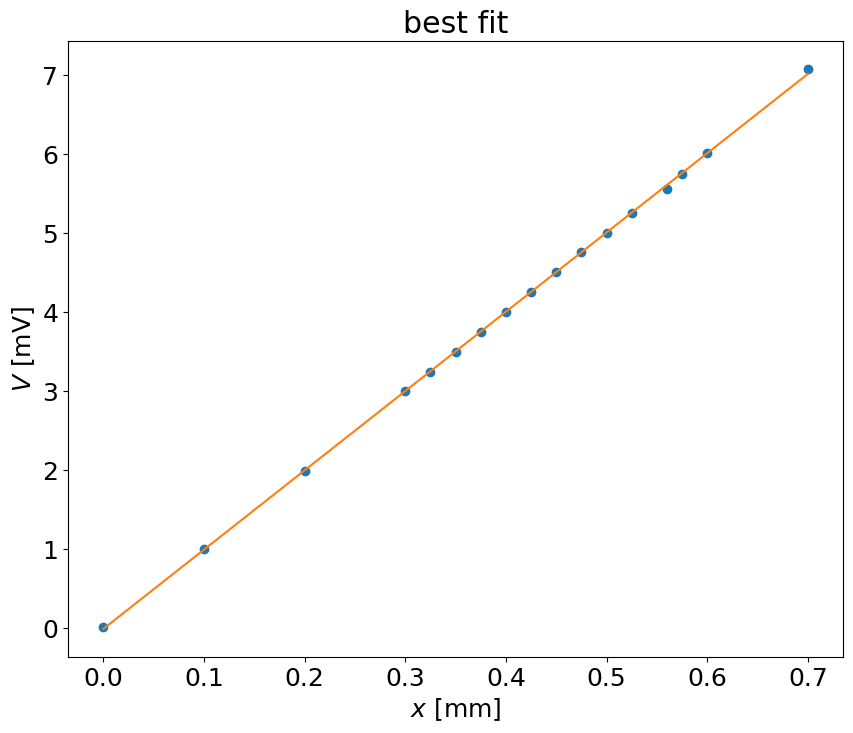

In [20]:
V_est = np.array(x)*K + b
plt.plot(x,V,'o',x,V_est)
plt.xlabel('$x$ [mm]')
plt.ylabel('$V$ [mV]')
plt.title('best fit')
# plt.legend(('$x$','$c^{0.047}$'),loc='best')